In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
#load and preprocess the data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
#build the CNN
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1509 - accuracy: 0.9548 - val_loss: 0.0712 - val_accuracy: 0.9769
Epoch 2/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0505 - accuracy: 0.9844 - val_loss: 0.0480 - val_accuracy: 0.9843
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0328 - accuracy: 0.9895 - val_loss: 0.0409 - val_accuracy: 0.9863
Epoch 4/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0197 - accuracy: 0.9940 - val_loss: 0.0485 - val_accuracy: 0.9842
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.0631 - val_accuracy: 0.9824


In [ ]:
#evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 2s 6ms/step - loss: 0.0631 - accuracy: 0.9824
Test accuracy: 0.9824000000953674


In [ ]:
#predictions for the test dataset
predicted_classes = model.predict(test_images)
predicted_classes = predicted_classes.argmax(axis=1)
true_classes = test_labels.argmax(axis=1)

313/313 [==============================] - 2s 6ms/step


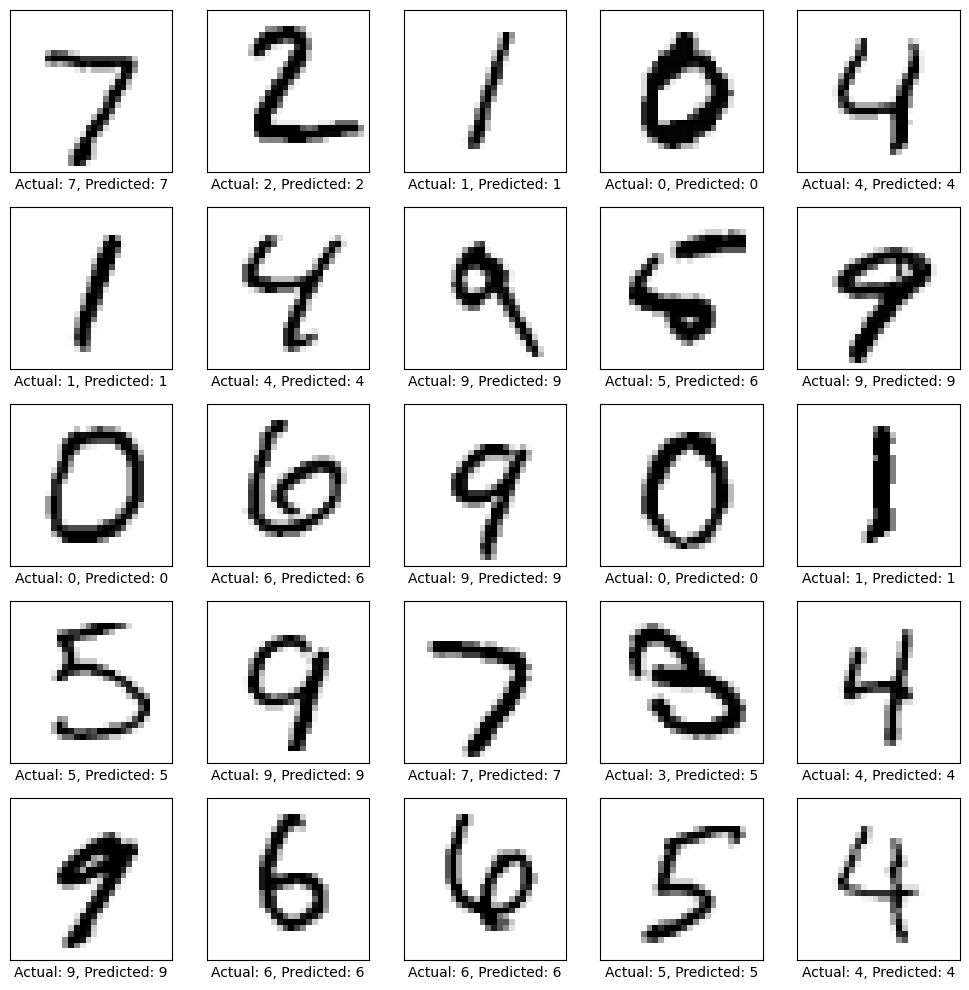

In [ ]:
#plot test images with their predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f'Actual: {true_classes[i]}, Predicted: {predicted_classes[i]}')
plt.tight_layout()
plt.show()